## Testing Parameters in BCFAgent

This notebook tests the impact of different parameter values on the performance of `BCFAgent`. 

The `nadd` parameter controls the number of additional posterior samples generated when updating the model. The `nbatch` parameter controls how often the model is updated.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from bart_playground.bandit.exp_util import *

### Run Experiments

In [2]:
# Values of nadd to test
param_list = [
        {'nadd': 1, 'nbatch': 1},
        {'nadd': 1, 'nbatch': 2},
        # {'nadd': 2, 'nbatch': 2}
]

# Run experiments
n_draws = 200
n_repeats = 4

all_results = run_multiple_experiments(
    param_list=param_list,
    n_repeats=n_repeats,
    n_draws=n_draws
)

Running experiment 0: nadd=1, nbatch=1


exp=0: 100%|██████████| 4/4 [01:03<00:00, 15.84s/it]


Running experiment 1: nadd=1, nbatch=2


exp=1: 100%|██████████| 4/4 [00:36<00:00,  9.22s/it]


In [3]:
# %prun -s cumtime -D profile_nadd.prof -q run_multiple_experiments(nadd_values=nadd_values,n_repeats=n_repeats,n_draws=n_draws)
# !gprof2dot -f pstats profile_nadd.prof -o profile_nadd.dot
# !dot -Tpng profile_nadd.dot -o profile_nadd.png

### Plot Results

Now let's plot the results with 50% confidence intervals:

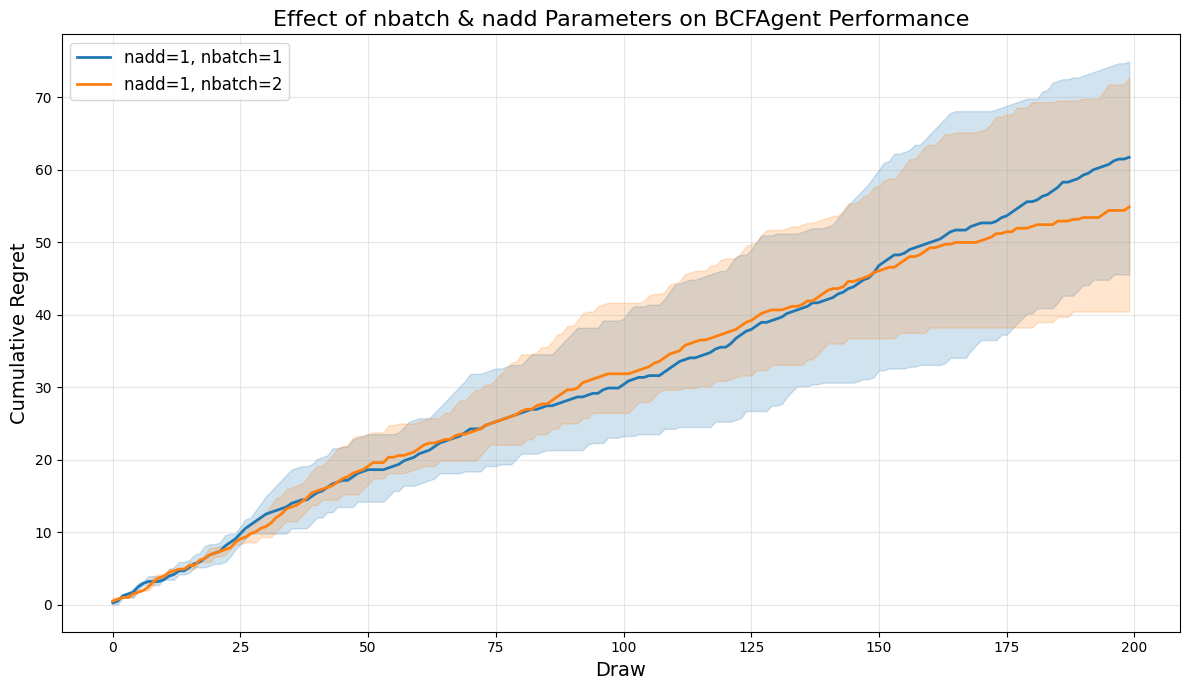

In [4]:
plot_results_with_confidence_intervals(all_results, n_draws)

In [5]:
print_results(all_results)

Average computation times (seconds):
nadd=1, nbatch=1: 15.6429 (±3.8595)
nadd=1, nbatch=2: 9.1668 (±0.0608)

Final cumulative regrets (mean ± std):
nadd=1, nbatch=1: 61.71 (±22.09)
nadd=1, nbatch=2: 54.87 (±25.20)


Simulation log saved to: ./results\parameter_test_20250309_031753\simulation_log_20250309_031753.txt
Plot saved to: ./results\parameter_test_20250309_031753\regret_plot_20250309_031753.png


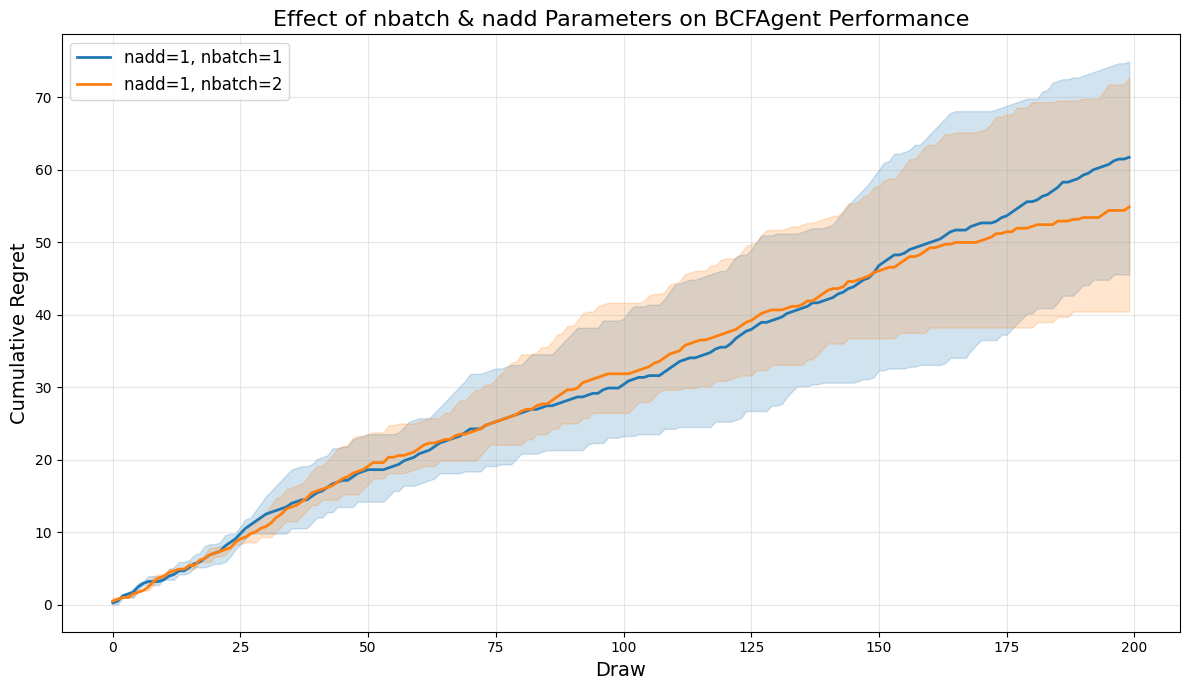

In [6]:
log_dir = log_simulation_results(
    all_results=all_results,
    n_draws=n_draws,
    n_repeats=n_repeats,
    param_list=param_list,
    base_dir="./results"
)